# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 수집

In [261]:
#데이터셋을 로드
from sklearn import datasets

boston = datasets.fetch_openml('boston')
boston

C:\Users\Playdata\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\Playdata\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':       CRIM      ZN   INDUS CHAS    NOX     RM     AGE    DIS RAD      TAX  \
 0   0.0063 18.0000  2.3100    0 0.5380 6.5750 65.2000 4.0900   1 296.0000   
 1   0.0273  0.0000  7.0700    0 0.4690 6.4210 78.9000 4.9671   2 242.0000   
 2   0.0273  0.0000  7.0700    0 0.4690 7.1850 61.1000 4.9671   2 242.0000   
 3   0.0324  0.0000  2.1800    0 0.4580 6.9980 45.8000 6.0622   3 222.0000   
 4   0.0691  0.0000  2.1800    0 0.4580 7.1470 54.2000 6.0622   3 222.0000   
 ..     ...     ...     ...  ...    ...    ...     ...    ...  ..      ...   
 501 0.0626  0.0000 11.9300    0 0.5730 6.5930 69.1000 2.4786   1 273.0000   
 502 0.0453  0.0000 11.9300    0 0.5730 6.1200 76.7000 2.2875   1 273.0000   
 503 0.0608  0.0000 11.9300    0 0.5730 6.9760 91.0000 2.1675   1 273.0000   
 504 0.1096  0.0000 11.9300    0 0.5730 6.7940 89.3000 2.3889   1 273.0000   
 505 0.0474  0.0000 11.9300    0 0.5730 6.0300 80.8000 2.5050   1 273.0000   
 
      PTRATIO        B  LSTAT  
 0    15.3000 396.9000

####  데이터 이해

In [262]:
#데이터셋 정보확인

In [263]:
dir(boston)
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

![image.png](./images/boston_features.png)

In [264]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
type(boston.data)

pandas.core.frame.DataFrame

In [265]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인

boston_df = boston.data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300


In [266]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [267]:
boston_df['PRCIE']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRCIE
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0,0.5730,6.5930,69.1000,2.4786,1,273.0000,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0,0.5730,6.1200,76.7000,2.2875,1,273.0000,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0,0.5730,6.9760,91.0000,2.1675,1,273.0000,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0,0.5730,6.7940,89.3000,2.3889,1,273.0000,21.0000,393.4500,6.4800,22.0000


In [268]:
#데이터의 크기와 형태를 확인
boston_df.info()   # info 자주쓰기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRCIE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [269]:
# 데이터프레임 정보
boston_df.drop(['CHAS'], axis = 1, inplace = True)
boston_df.drop(['RAD'], axis = 1, inplace = True)

#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [270]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [271]:
# CHAS 컬럼 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  PRCIE    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [272]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

In [273]:
fea = []
for f in boston_df.columns[:-1]:
    fea.append(f)
fea

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)

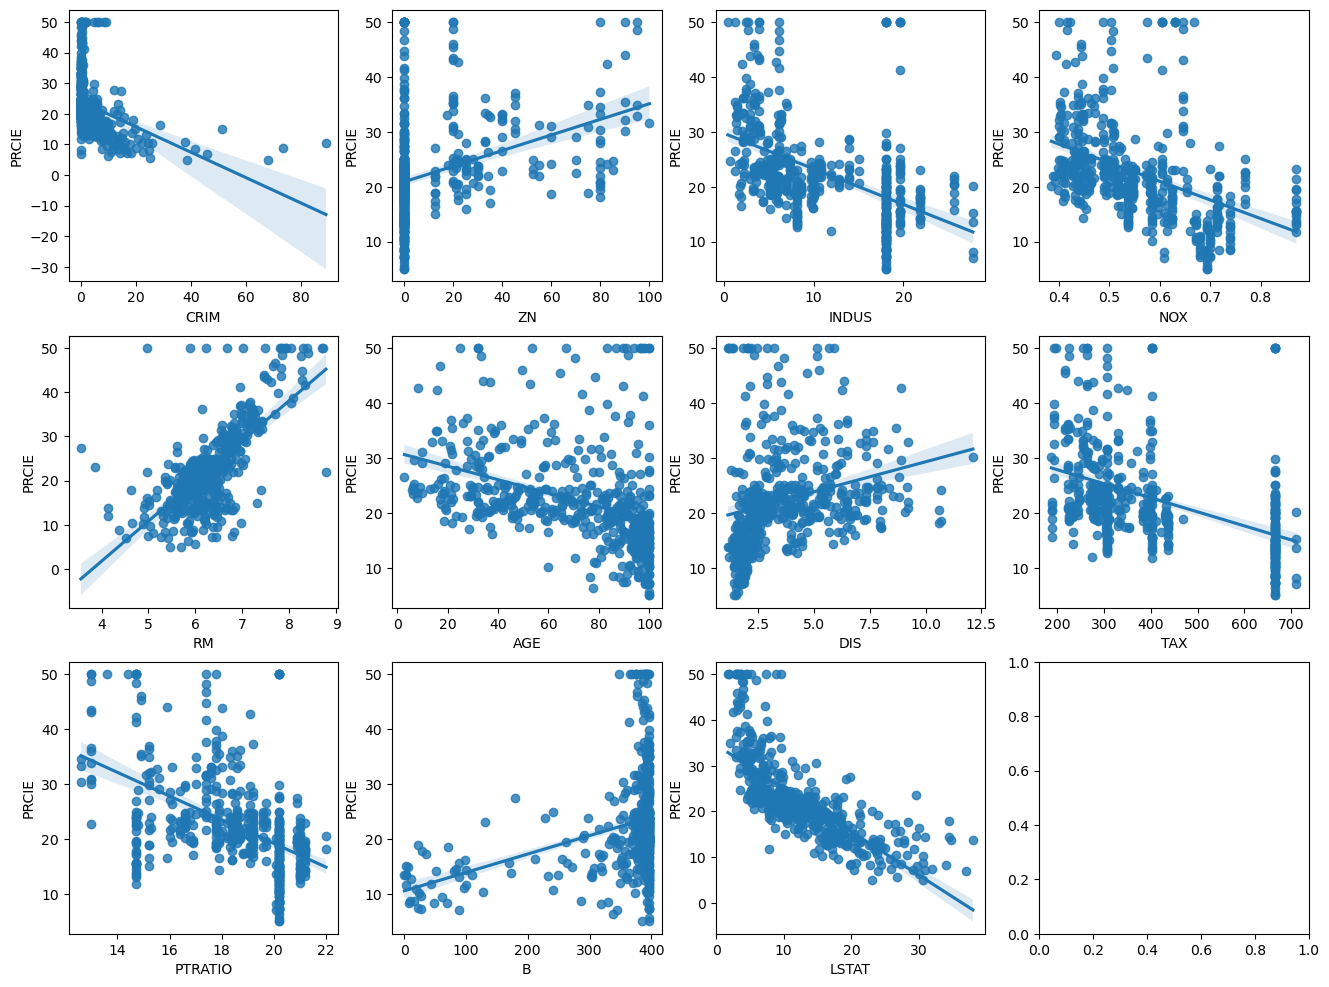

In [274]:
# 각각의 독립변수와 종속변수 간의 관계를 시각화하여 subplot으로 그림
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 캔버스 준비
# 커다란 스케치북에 3열 4행의 네모칸 준비
fix, ax = plt.subplots(figsize = (16, 12), nrows = 3, ncols = 4) 
# i(인덱스), feature(value) 불러오기
for i, feature in enumerate(boston_df.columns[:-1]) : 
    row = int(i / 4)
    col = i % 4
#print(i, feature)
    sns.regplot(x=feature, y = 'PRCIE', data=boston_df, ax=ax[row][col])

In [275]:
for i, x in enumerate(['a','b','c']):
    print(i,x)

0 a
1 b
2 c


#### pairplot(): 수치형 변수에 적용 가능

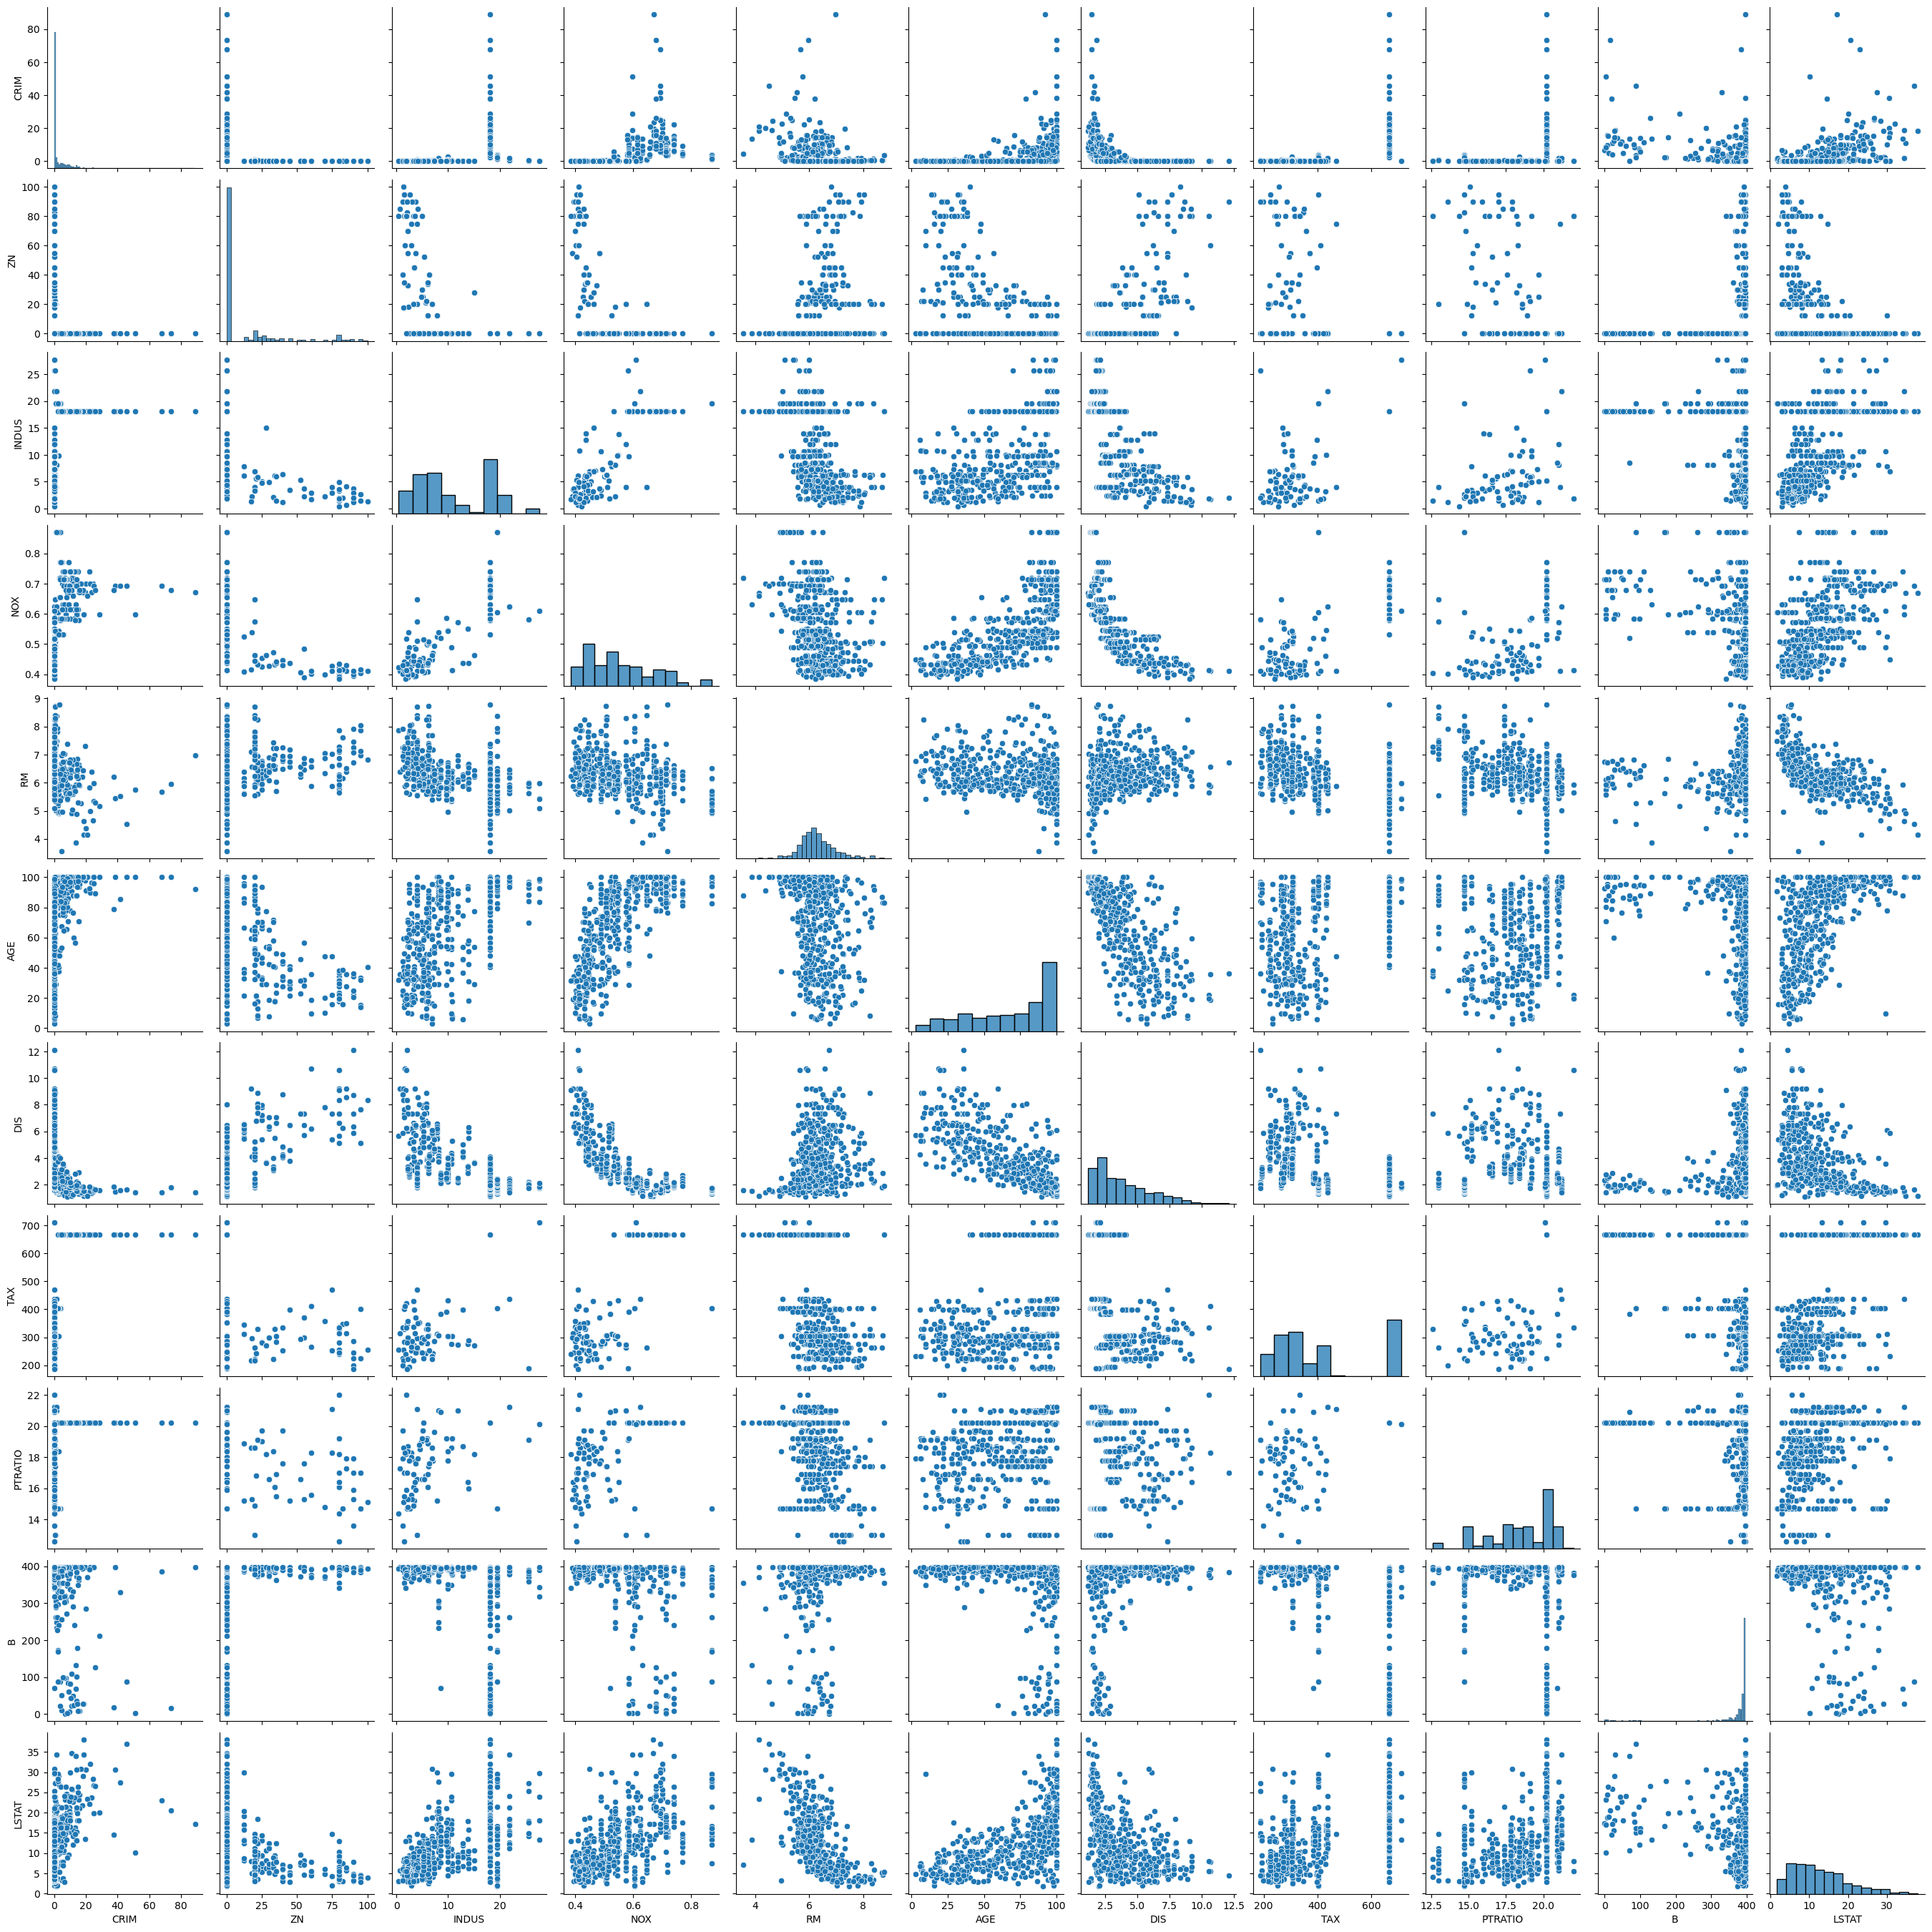

In [276]:
# pairplot()으로 독립변수 간의 관계를 시각화
features = boston_df.columns[:-1]
# features = ['INDUS','LSTAT','RM','PRCIE']
sns.pairplot(boston_df[features])

<AxesSubplot:>

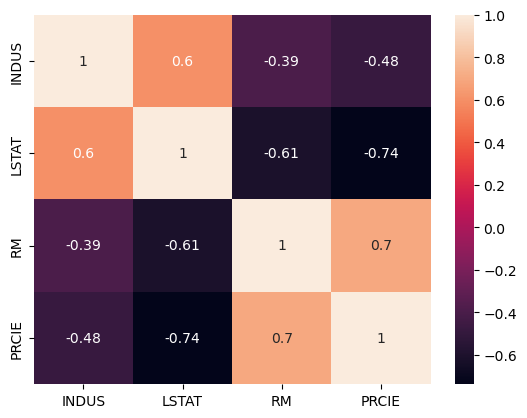

In [277]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
features = ['INDUS','LSTAT','RM','PRCIE']
corr_df = boston_df[features].corr()
sns.heatmap(corr_df,annot=True)
#EDA 끝

In [278]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [279]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

In [280]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRCIE
0,0.0063,18.0000,2.3100,0.5380,6.5750,65.2000,4.0900,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.4690,6.4210,78.9000,4.9671,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.4690,7.1850,61.1000,4.9671,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.4580,6.9980,45.8000,6.0622,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0.4580,7.1470,54.2000,6.0622,222.0000,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0.5730,6.5930,69.1000,2.4786,273.0000,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0.5730,6.1200,76.7000,2.2875,273.0000,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0.5730,6.9760,91.0000,2.1675,273.0000,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0.5730,6.7940,89.3000,2.3889,273.0000,21.0000,393.4500,6.4800,22.0000


### 데이터 준비

#### 데이터 분할

In [281]:
x = boston_df.drop(['PRCIE'], axis = 1)
x = boston_df[boston_df.columns[:-1]]

In [282]:
from sklearn.model_selection import train_test_split

# X(독립변수), Y(종속변수) 분할
x = boston_df.drop(['PRCIE'], axis = 1)
y = boston_df['PRCIE']

# 학습용 데이터와 평가용 데이터로 분할하기
x_train, x_test, y_train, y_test = train_test_split(\
                                    x,y, test_size = 0.3, random_state = 42)

In [283]:
#X_train 데이터 일부 확인
x_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
5,0.0299,0.0000,2.1800,0.4580,6.4300,58.7000,6.0622,222.0000,18.7000,394.1200,5.2100
116,0.1316,0.0000,10.0100,0.5470,6.1760,72.5000,2.7301,432.0000,17.8000,393.3000,12.0400
45,0.1714,0.0000,6.9100,0.4480,5.6820,33.8000,5.1004,233.0000,17.9000,396.9000,10.2100
16,1.0539,0.0000,8.1400,0.5380,5.9350,29.3000,4.4986,307.0000,21.0000,386.8500,6.5800
468,15.5757,0.0000,18.1000,0.5800,5.9260,71.0000,2.9084,666.0000,20.2000,368.7400,18.1300


### 모델 클래스 선택

In [284]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### 모델 구축 

In [285]:
#학습 수행
reg = lr.fit(x_train, y_train)

In [286]:
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision = 2, suppress = True)

In [287]:
reg.coef_, reg.intercept_

(array([ -0.1 ,   0.03,   0.01, -12.36,   4.41,  -0.01,  -1.39,   0.  ,
         -0.84,   0.01,  -0.56]),
 25.260574892310537)

### 모델 평가

In [288]:
def get_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return (mse, rmse, r2)

In [289]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(x_test)

# 평가 지표 계산

mse, rmse, r2 = get_score(y_test, y_pred)
print(mse,rmse,r2)

23.51759959647687 4.849494777446087 0.6843830011725003


In [290]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(x_train)

#독립변수의 갯수
k = len(x_train.columns)

# 수정된 결정 계수
ajd_r2 = 1 - ((1 - r2) * (n - 1))/ (n - k - 1)
print(ajd_r2)

0.674231577233604


![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [291]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인
pd.Series(data = reg.coef_, index = x_train.columns)
# ndarray의 실수를 부동 소수점으로 출력

# 회귀 계수와 절편 값 확인

# ndarray의 실수 출력 옵션 복구


CRIM       -0.104
ZN          0.029
INDUS       0.008
NOX       -12.360
RM          4.412
AGE        -0.013
DIS        -1.387
TAX         0.002
PTRATIO    -0.840
B           0.012
LSTAT      -0.560
dtype: float64

In [292]:
# 본래의 출력 옵션


In [293]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data = reg.coef_, index = x_train.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending = False)


RM          4.412
ZN          0.029
B           0.012
INDUS       0.008
TAX         0.002
AGE        -0.013
CRIM       -0.104
LSTAT      -0.560
PTRATIO    -0.840
DIS        -1.387
NOX       -12.360
dtype: float64

In [294]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


## 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포차이를 그린다

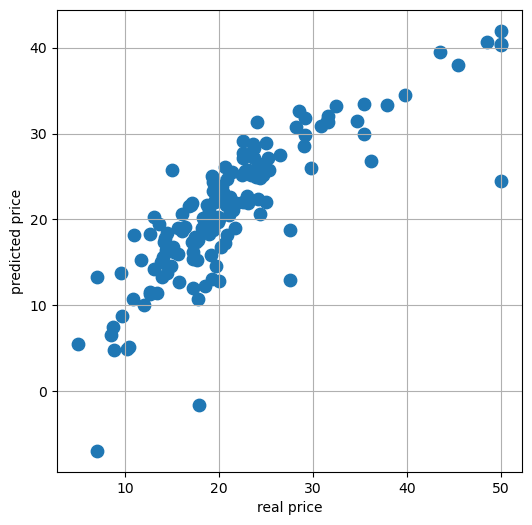

In [295]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_pred, s = 80)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.grid() # 실제값과 예측값이 (10, 10), (20, 20), (30, 30), (40, 40)에 모여있다면 좋은 모델

###  실제값과 예측값의 분포차이를 시각화

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [296]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.



# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [297]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

In [298]:
diab = load_diabetes()

### 데이터 수집

### 데이터 이해

In [299]:
diab.keys()
print(diab.DESCR)
# 442개의 관찰. 10개의 독립변수를 가짐. 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [300]:
diab_df = pd.DataFrame(diab.data, columns = diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047
...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026


### 상관계수 구하기

<AxesSubplot:>

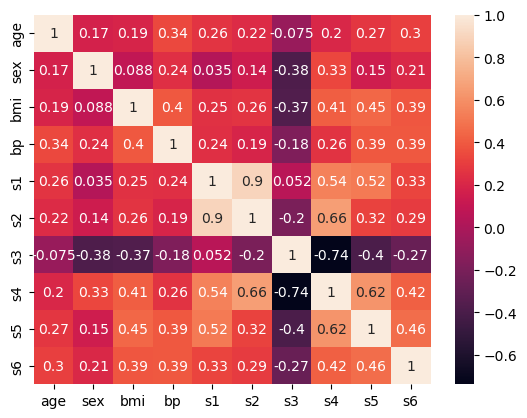

In [301]:
# 변수 간의 상관관계를 히트맵으로 시각화 및 탐색
# 0.4 ~ 0.6 넘으면 상관관계가 꽤 있다고 생각해라
# 상관 계수를 구하여 저장
corr_df = diab_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns

sns.heatmap(corr_df, annot = True)

In [302]:
type(diab.data)

numpy.ndarray

In [303]:
pd.DataFrame(diab.data)

,0,1,2,3,4,5,6,7,8,9
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047
...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026


In [304]:
pd.options.display.float_format = '{:.4f}'.format   # 진수 바꿔줌

In [305]:
pd.DataFrame(diab.data).describe() # 기초 통계정보 확인

,0,1,2,3,4,5,6,7,8,9
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


In [306]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 데이터 준비

In [307]:
x = diab.data
y = diab.target
x

array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
       [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
       [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
       ...,
       [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
       [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
       [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]])

In [308]:
# 학습용 검증용 데이터셋 분리
from sklearn.model_selection import train_test_split
# 하나의 데이터만 떼어 놓는
x_train, x_test, y_train, y_test = train_test_split(\
                                                    x, y, test_size = 0.2, random_state = 27)

### 모델 구축

In [309]:
from sklearn.linear_model import LinearRegression
# 회귀 모델 객체 생성

lr = LinearRegression()

### 모델학습수행

In [310]:
reg = lr.fit(x_train, y_train)

### 회귀 계수, 절편 확인

In [311]:
# coef에 10개가 들어가있음
coef = reg.coef_
intercept = reg.intercept_
intercept
coef

array([  42.13, -256.72,  585.67,  300.38, -870.33,  492.32,  184.86,
        262.17,  772.19,   54.45])

### 모델 평가

In [312]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return (mse, rmse, r2)
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(x_test)  # 예측값에서 predict한 값은 ?

# 평가 지표 계산

mse, rmse, r2 = evaluate_score(y_test, y_pred)

# format은 왜 넣어요?ㅎㅎ
print(f'mse : {mse:.3f}, rmse : {rmse : .3f}, r2 : {r2 : .3f}'.format(mse,rmse,r2))  

mse : 2712.489, rmse :  52.082, r2 :  0.395


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [313]:
# Series로 보는게 더 남( array보다 라벨로 인덱스를 쓸수 있음.인덱스값도 줄수있음)
coef = pd.Series(coef, index = diab.feature_names)
coef
# 당뇨병에 대해 bmi와 s5가 큰영향을 미치는 것을 알 수 있음

age     42.1333
sex   -256.7243
bmi    585.6677
bp     300.3791
s1    -870.3327
s2     492.3214
s3     184.8594
s4     262.1716
s5     772.1858
s6      54.4472
dtype: float64

###  실제값과 예측값의 분포차이를 시각화

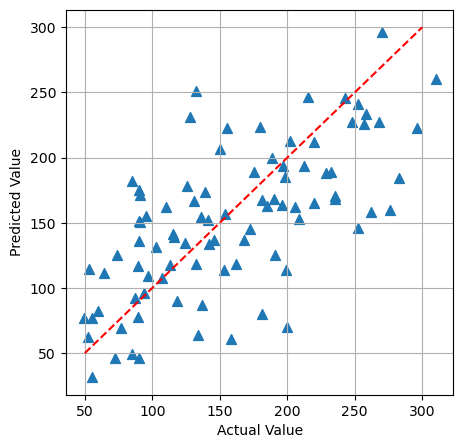

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.scatter(y_test, y_pred, s = 50, marker = '^')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot([50,300],[50,300], ls = '--', c = 'r')
plt.grid()

# [응용2] 캘리포니아 주택 가격

In [315]:
import pandas as pd
import numpy as np

<img src = 'C:/python/ML_DL/images/cali_house_features.png' width = '450' height = '450'/>

In [316]:
import os
os.getcwd()

'C:\\python'

### 데이터 수집 및 탐색

In [317]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
# from sklearn.dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [318]:
housing.feature_names,housing.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [319]:
# 샘플:20640
housing_df = pd.DataFrame(housing.data,columns = housing.feature_names)
# housing_df 에 타겟열을 추가하고 데이터를 입력하시오
housing_df['Price']=housing.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0000,5.0455,1.1333,845.0000,2.5606,39.4800,-121.0900,0.7810
20636,2.5568,18.0000,6.1140,1.3158,356.0000,3.1228,39.4900,-121.2100,0.7710
20637,1.7000,17.0000,5.2055,1.1201,1007.0000,2.3256,39.4300,-121.2200,0.9230
20638,1.8672,18.0000,5.3295,1.1719,741.0000,2.1232,39.4300,-121.3200,0.8470


In [320]:
#속성 :8개


### 시각화로 탐색

In [321]:
#데이터프레임으로 변환

# 기초 통계량 확인
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


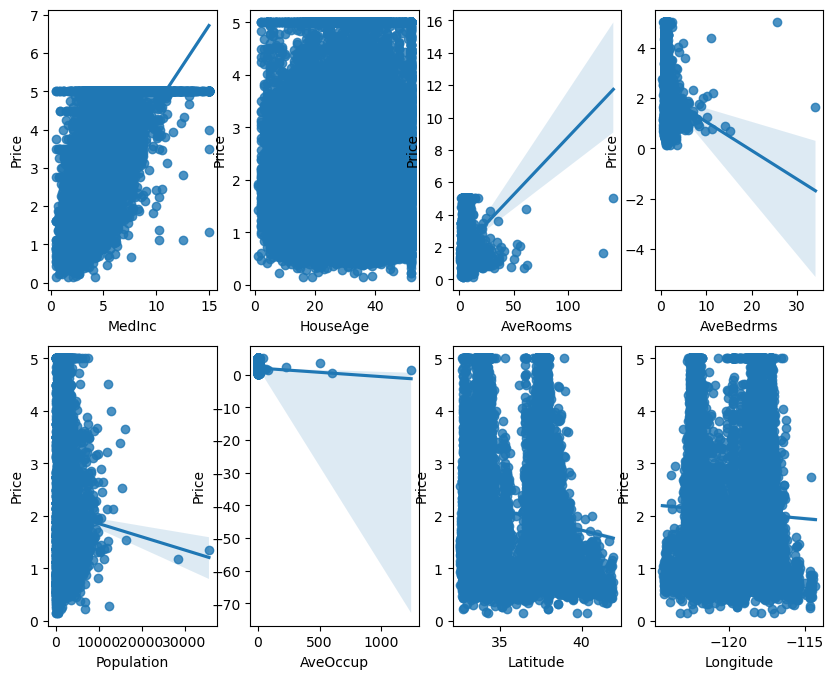

In [322]:
# (y축)종속(price)변수 VS (x축)독립변수(8개)  관계 시각화 탐색
# subplot의 구조를 2행 4열로 구조화

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,8),nrows = 2, ncols = 4)
x_features = housing.feature_names

# 특성 8개 순서대로 돌려
for i, feature in enumerate(x_features):
    row = int( i / 4 )   # i 가 
    col = i % 4
    sns.regplot(x = feature, y = 'Price', data = housing_df, ax = ax[row][col])

In [323]:
# 독립변수 간 상관관계 확인

In [324]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.0000,-0.1190,0.3269,-0.0620,0.0048,0.0188,-0.0798,-0.0152,0.6881
HouseAge,-0.1190,1.0000,-0.1533,-0.0777,-0.2962,0.0132,0.0112,-0.1082,0.1056
AveRooms,0.3269,-0.1533,1.0000,0.8476,-0.0722,-0.0049,0.1064,-0.0275,0.1519
AveBedrms,-0.0620,-0.0777,0.8476,1.0000,-0.0662,-0.0062,0.0697,0.0133,-0.0467
Population,0.0048,-0.2962,-0.0722,-0.0662,1.0000,0.0699,-0.1088,0.0998,-0.0246
AveOccup,0.0188,0.0132,-0.0049,-0.0062,0.0699,1.0000,0.0024,0.0025,-0.0237
Latitude,-0.0798,0.0112,0.1064,0.0697,-0.1088,0.0024,1.0000,-0.9247,-0.1442
Longitude,-0.0152,-0.1082,-0.0275,0.0133,0.0998,0.0025,-0.9247,1.0000,-0.0460
Price,0.6881,0.1056,0.1519,-0.0467,-0.0246,-0.0237,-0.1442,-0.0460,1.0000


In [325]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

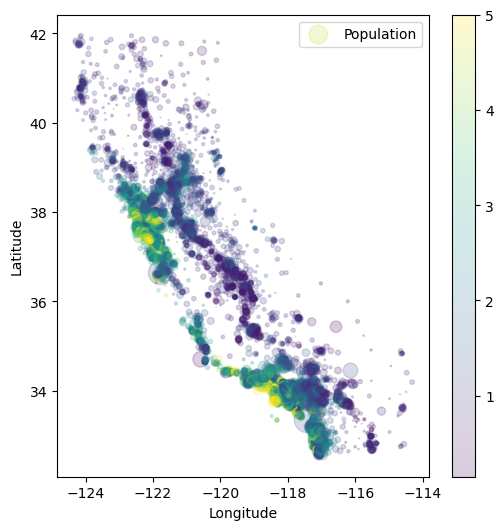

In [326]:
# 위경도 데이터 시각화
# housing_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2) # 위도 경도
# plt.figure(figsize = (10,12))
# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고,
# 주택 가격에 따라 점의 색깔을 다르게 한다
housing_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2,\
               s = housing_df['Population']/100,
               c = housing_df['Price'], cmap = plt.get_cmap('viridis'),
               figsize = (6,6), 
               label = 'Population')


<AxesSubplot:>

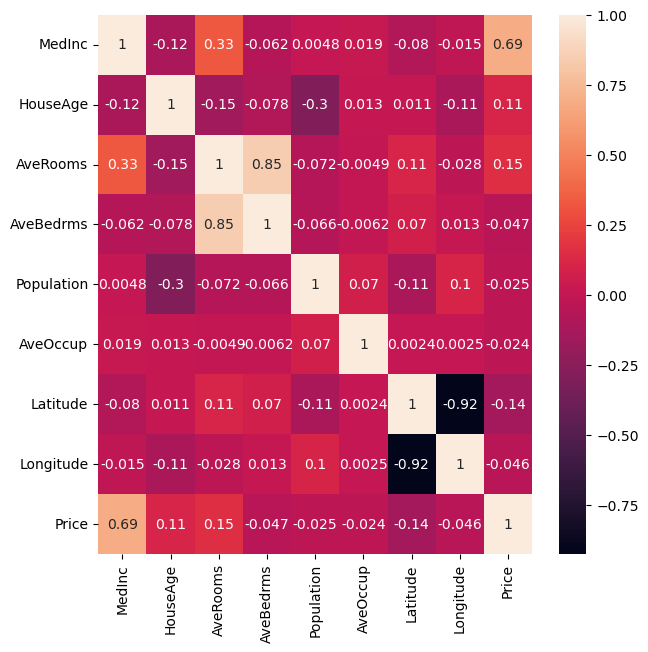

In [327]:
# 상관 계수 히트맵
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
ccol = housing_df.columns

# 변수 간의 상관 계수를 구한다
corr = housing_df[ccol].corr()

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션

plt.figure(figsize = (7,7))
sns.heatmap(corr, annot= True)

y =  0.44x + -37.51575


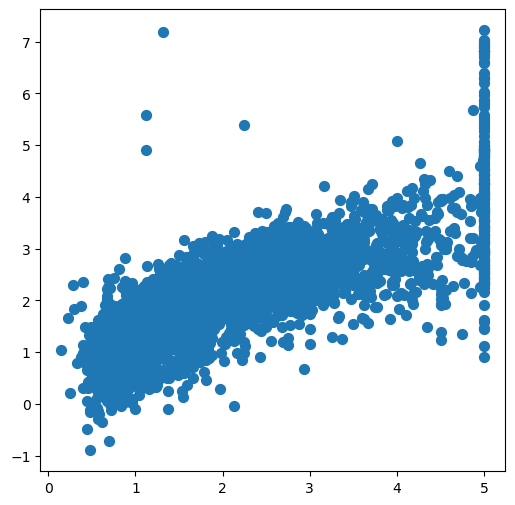

In [328]:
# 선형회귀 모델 구축
x = housing.data
y = housing.target

# 학습용 검증용 데이터셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(\
                                    x,y, test_size = 0.2, random_state = 1)
# 모델 구축
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 학습 수행
reg = lr.fit(x_train, y_train)

coef = reg.coef_
intercept = reg.intercept_
coef = pd.Series(coef, index = housing.feature_names)
coef.sort_values(ascending = False)

### 회귀식으로 표현
w1 = reg.coef_[0]
w0 = reg.intercept_
print(f'y = {w1 : .2f}x + {w0 : .5f}')
# 결과 시각화 ( actual price VS predicted price)
# 모델이 원하는 결과가 나오지 않았을때 독립 변수를 바꾸거나 새로운 데이터를 가지고 옴

y_pred = reg.predict(x_test)  
plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred, s = 50)

In [329]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(x_test)  

# 평가 지표 계산
evaluate_score(y_test, y_pred)

# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수

# 수정된 결정 계수


(0.5291402345397406, 0.7274202599183918, 0.5965968374812278)

# [도전] 펭귄 몸무게 예측(dacon)

# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor